<a href="https://colab.research.google.com/github/SrinidhiMokidi/AIML/blob/main/LAB_5_AIML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

In [5]:
df = pd.read_csv('/content/sample_data/titanic_train.csv')

In [6]:
print(df.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [7]:
summary = df.describe(percentiles=[.25, .50, .75, .90])
print(summary)

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
90%     802.000000    1.000000    3.000000   50.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
90%      2.000000   77.958300  
max      6.

In [8]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


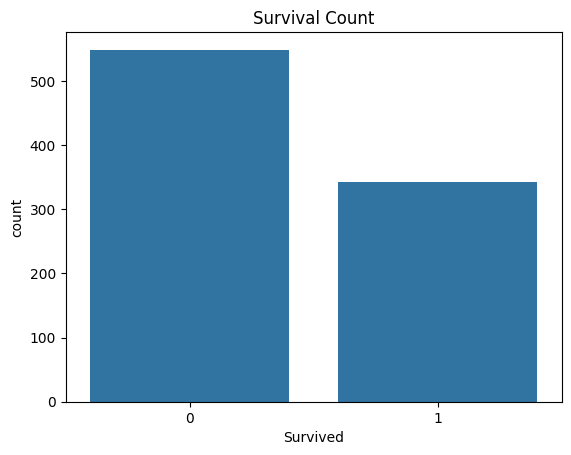

In [9]:
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.show()

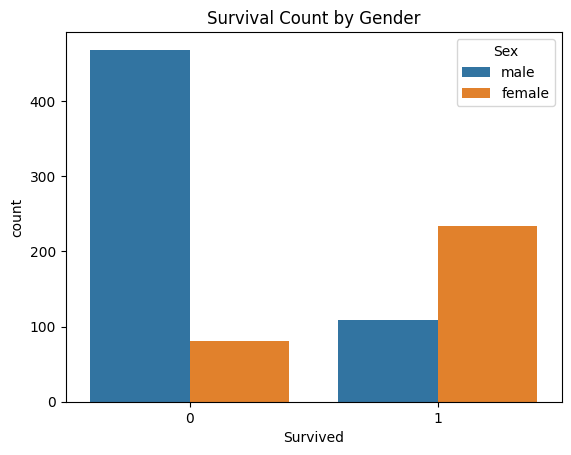

In [10]:
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival Count by Gender')
plt.show()

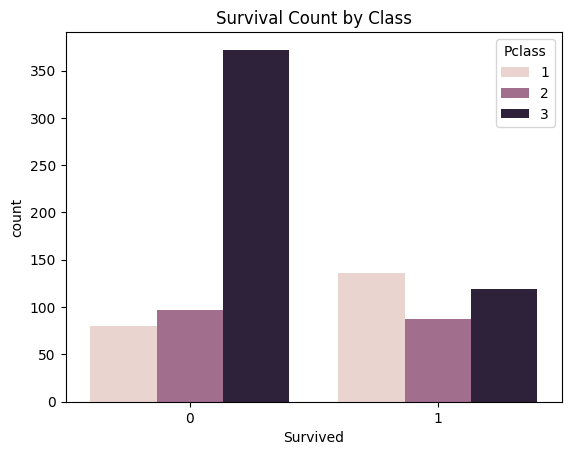

In [11]:
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title('Survival Count by Class')
plt.show()

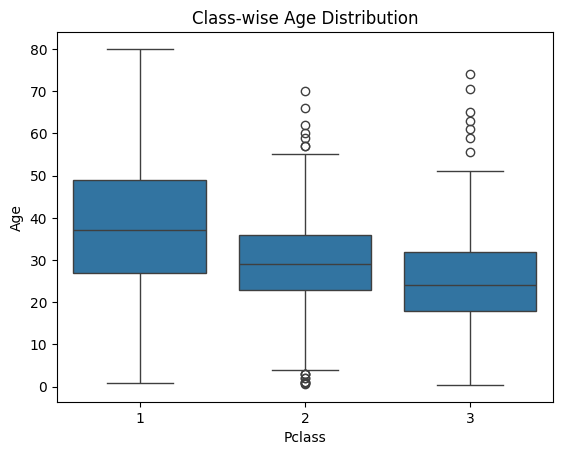

In [12]:
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title('Class-wise Age Distribution')
plt.show()


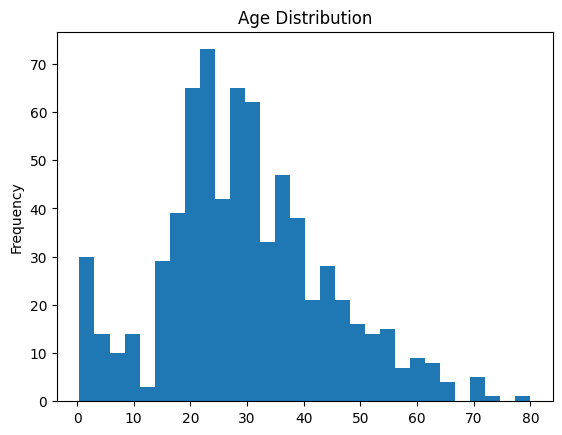

In [13]:
df['Age'].plot(kind='hist', bins=30)
plt.title('Age Distribution')
plt.show()

In [14]:
df['Age'].fillna(df['Age'].median(), inplace=True)

In [15]:
df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [16]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
df['Embarked'].fillna(0, inplace=True)  # Handle missing values in 'Embarked'

In [17]:
X = df.drop('Survived', axis=1)
Y = df['Survived']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [18]:
X = df.drop('Survived', axis=1)
Y = df['Survived']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [19]:
log_reg = LogisticRegression(max_iter=1000)

In [20]:
log_reg.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [21]:
Y_pred = log_reg.predict(X_test)

f1 = f1_score(Y_test, Y_pred)
print("F1 Score: ",f1)

F1 Score:  0.75


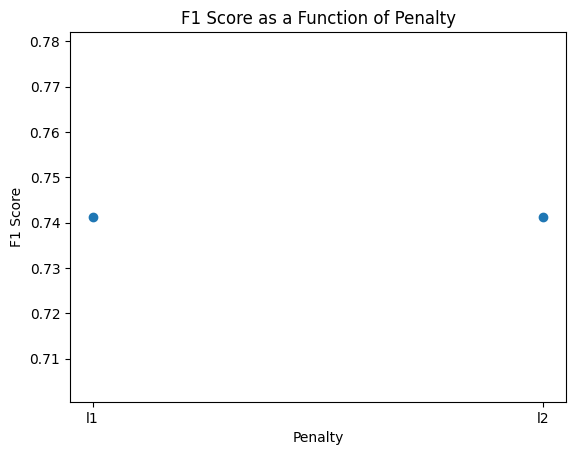

In [22]:
penalties = ['l1', 'l2']
f1_scores = []

for penalty in penalties:
    model = LogisticRegression(penalty=penalty, solver='liblinear')
    model.fit(X_train, Y_train)
    Y_pred_penalty = model.predict(X_test)
    f1_scores.append(f1_score(Y_test, Y_pred_penalty))

plt.scatter(penalties, f1_scores)
plt.title('F1 Score as a Function of Penalty')
plt.ylabel('F1 Score')
plt.xlabel('Penalty')
plt.show()

